# About the Dataset


* Fashion-MNIST is a dataset of of a training set of 60,000 examples and a test set of 10,000 examples.

* Each example is a 28x28 grayscale image, associated with a label from 10 classes.

* Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

# Task

To come up with a model that can predict label for each image

# Libraries

In [ ]:
# For numerical analysis
import numpy as np

# To store and process in a dataframe
import pandas as pd

# For ploting graphs
import matplotlib.pyplot as plt

# Advance ploting
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv')

# Data

In [ ]:
print(train.shape)

In [ ]:
print(test.shape)

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
print(train.isna().sum())

In [ ]:
print(test.isna().sum())

In [ ]:
item = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
        5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


In [ ]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.countplot(train, x= 'label', palette=['#333333'])
plt.title('Test label count')
plt.plot()

plt.subplot(1,2,2)
sns.countplot(test,x='label', palette= ['#fb0203'])
plt.title('Test label count')
plt.plot()

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(item[row[0]])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dense, Flatten,Dropout


In [ ]:
X_train= train.iloc[:, 1:].to_numpy()
y_train= train['label'].to_numpy()

X_test= test.iloc[:,1:].to_numpy()
y_test= test['label'].to_numpy()
for i in [X_train, y_train, X_test, y_test]:
  print(i.shape)

In [ ]:
X_train= X_train.reshape(-1, 28, 28, 1)
X_test= X_test.reshape(-1, 28, 28, 1)

In [ ]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

In [ ]:
y_train_enc= to_categorical(y_train, num_classes= 10)
y_test_enc= to_categorical(y_test, num_classes= 10)

In [ ]:
for i in [X_train, y_train_enc, X_test, y_test_enc]:
  print(i.shape)

In [ ]:
X_train, X_val, y_train_enc, y_val_enc= train_test_split(X_train, y_train_enc, test_size= 0.3)
for i in [X_train, y_train_enc, X_val, y_val_enc]:
  print(i.shape)

In [ ]:
INPUT_SHAPE= (28, 28, 1)
OUTPUT_SHAPE= 10
BATCH_SIZE= 128
EPOCHS= 10
VERBOSE= 2

In [ ]:
model= Sequential()

model.add(Conv2D(32, kernel_size= (3, 3), activation= 'relu', input_shape= INPUT_SHAPE))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, kernel_size= (3, 3), activation= 'relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation= 'softmax'))

In [ ]:
model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train,y_train_enc, epochs= EPOCHS, batch_size= BATCH_SIZE, verbose= VERBOSE, validation_split=0.3)

In [ ]:
plt.figure(figsize= (14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Loss')
plt.legend(loc= 'upper right')
plt.title('TRAINING AND VALIDATION LOSS')
plt.show()

In [34]:
model.evaluate(X_val, y_val_enc)

563/563 [==============================] - 7s 12ms/step - loss: 0.3799 - accuracy: 0.8902


[0.3798925280570984, 0.8901666402816772]

In [36]:
y_pred_enc= model.predict(X_test)
y_pred= [np.argmax(i) for i in y_pred_enc]
print(y_pred_enc[0])
print(y_pred[0])

313/313 [==============================] - 2s 7ms/step
[8.6003792e-01 5.1447026e-14 4.4007252e-06 7.2900229e-07 1.8118088e-10
 8.8364688e-15 1.3995698e-01 7.0048201e-16 7.8562081e-13 4.2919993e-17]
0


<ipython-input-41-78a3facda5ad>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 4, ind+1)


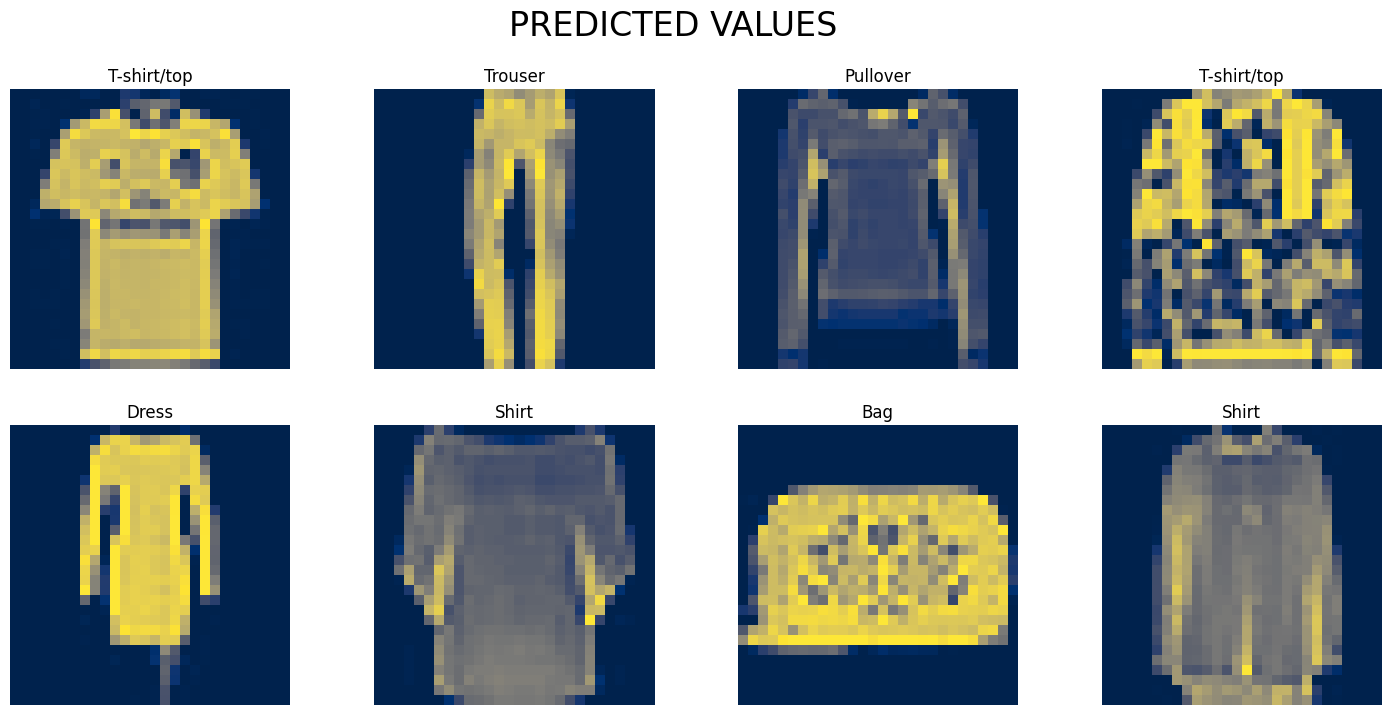

In [41]:
fig,ax= plt.subplots(figsize= (18, 8))
for ind, row in enumerate(X_test[:8]):
  plt.subplot(2, 4, ind+1)
  plt.title(item[y_pred[ind]])
  img= row.reshape(28, 28)
  fig.suptitle('PREDICTED VALUES', fontsize= 24)
  plt.axis('off')
  plt.imshow(img, cmap= 'cividis')

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.89      0.75      0.81      1000
           3       0.87      0.94      0.90      1000
           4       0.80      0.86      0.83      1000
           5       0.97      0.97      0.97      1000
           6       0.74      0.67      0.70      1000
           7       0.96      0.92      0.94      1000
           8       0.98      0.98      0.98      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



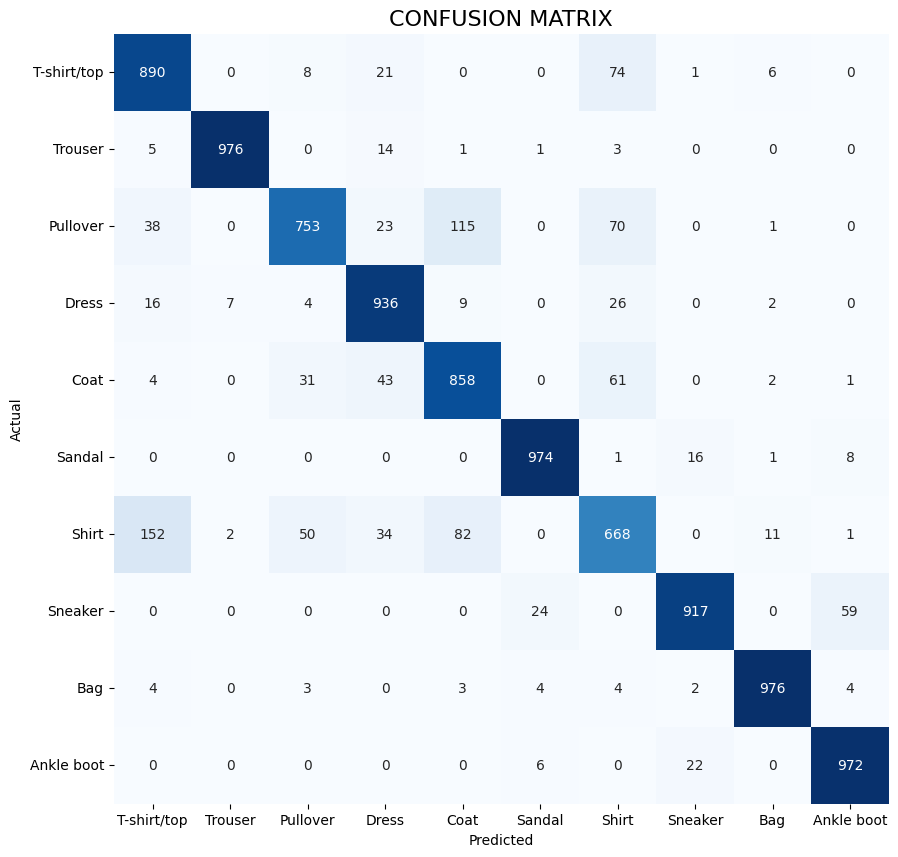

In [44]:
fig, ax= plt.subplots(figsize= (10, 10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cbar=False,fmt='1d',cmap='Blues',ax=ax)
ax.set_title('CONFUSION MATRIX', loc= 'center', fontsize= 16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(item.values())
ax.set_yticklabels(item.values(), rotation= 0)
plt.show()